In [ ]:
# Chargement et visualisation global du données
import pandas as pd

df = pd.read_csv(r'C:\Users\voadi\Documents\Voady\test-Data-engineer-voady\data\all_data.csv')

print(df.shape)
print(df.head())
print(df.dtypes)
print(df.isnull().sum())

(186850, 6)
  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
Order ID            str
Product             str
Quantity Ordered    str
Price Each          str
Order Date          str
Purchase Address    str
dtype: object
Order ID            545
Product             545
Quantity Orde

**Nettoyage des données et création des nouveaux colonnes**

In [ ]:
# Suppression des lignes nulles
df.dropna(inplace=True)

# Conversion des données de type numerique et de type date
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Extraction mois et ville
df['Month'] = df['Order Date'].dt.month
# df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1].strip())
# df['State'] = df['Purchase Address'].apply(lambda x: x.split(',')[2].strip().split(' ')[1])
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1].strip())
df['State'] = df['Purchase Address'].apply(lambda x: x.split(',')[2].strip().split(' ')[0])
df['location'] = df['City'] + ' (' + df['State'] + ')'
print(df.head())



  Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable               2.0       11.95   
2   176559  Bose SoundSport Headphones               1.0       99.99   
3   176560                Google Phone               1.0      600.00   
4   176560            Wired Headphones               1.0       11.99   
5   176561            Wired Headphones               1.0       11.99   

           Order Date                      Purchase Address  Month  \
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001      4   
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215      4   
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4   
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4   
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001      4   

          City State          location  
0       Dallas    TX       Dallas (TX)  
2       Boston    MA       Boston (MA)  
3  Los Angeles    CA  L

In [ ]:
# Filtre des données par rapport aux produits cibles
products = ['ThinkPad Laptop', 'AAA Batteries (4-pack)']
df_filtered = df[df['Product'].isin(products)]
print(df_filtered.head())

   Order ID                 Product  Quantity Ordered  Price Each  \
20   176575  AAA Batteries (4-pack)               1.0        2.99   
28   176583  AAA Batteries (4-pack)               2.0        2.99   
32   176586  AAA Batteries (4-pack)               2.0        2.99   
45   176598  AAA Batteries (4-pack)               2.0        2.99   
54   176607  AAA Batteries (4-pack)               2.0        2.99   

            Order Date                        Purchase Address  Month  \
20 2019-04-27 00:30:00    433 Hill St, New York City, NY 10001      4   
28 2019-04-20 12:00:00      146 Jackson St, Portland, OR 97035      4   
32 2019-04-10 17:00:00  365 Center St, San Francisco, CA 94016      4   
45 2019-04-21 20:33:00    294 Park St, San Francisco, CA 94016      4   
54 2019-04-18 12:11:00           689 10th St, Boston, MA 02215      4   

             City State            location  
20  New York City    NY  New York City (NY)  
28       Portland    OR       Portland (OR)  
32  San 

**Visualisation de données**

       location                 Product  Quantity Ordered
0  Atlanta (GA)  AAA Batteries (4-pack)            2359.0
1  Atlanta (GA)         ThinkPad Laptop             357.0
2   Austin (TX)  AAA Batteries (4-pack)            1668.0
3   Austin (TX)         ThinkPad Laptop             210.0
4   Boston (MA)  AAA Batteries (4-pack)            3461.0


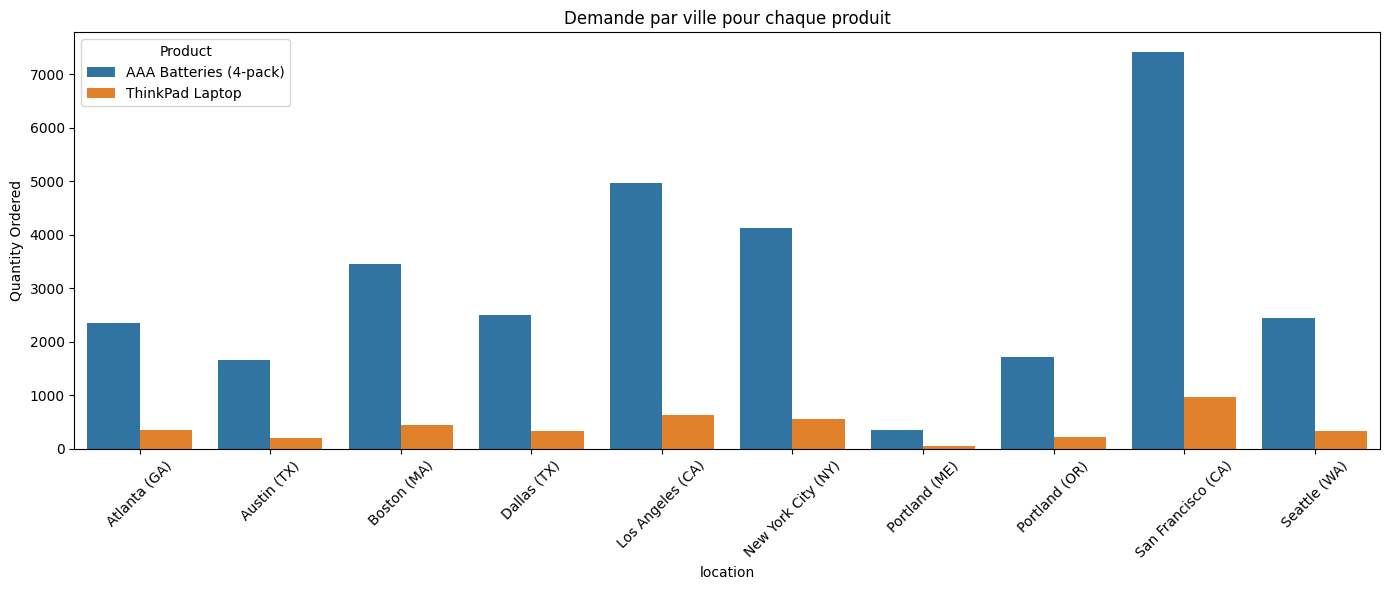

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
# visualisation quantité de produit commandée par location par produit 
demand = df_filtered.groupby(['location', 'Product'])['Quantity Ordered'].sum().reset_index()
print(demand.head())
plt.figure(figsize=(14, 6))
sns.barplot(data=demand, x='location', y='Quantity Ordered', hue='Product')
plt.xticks(rotation=45)
plt.title('Demande par ville pour chaque produit')
plt.tight_layout()
plt.show()

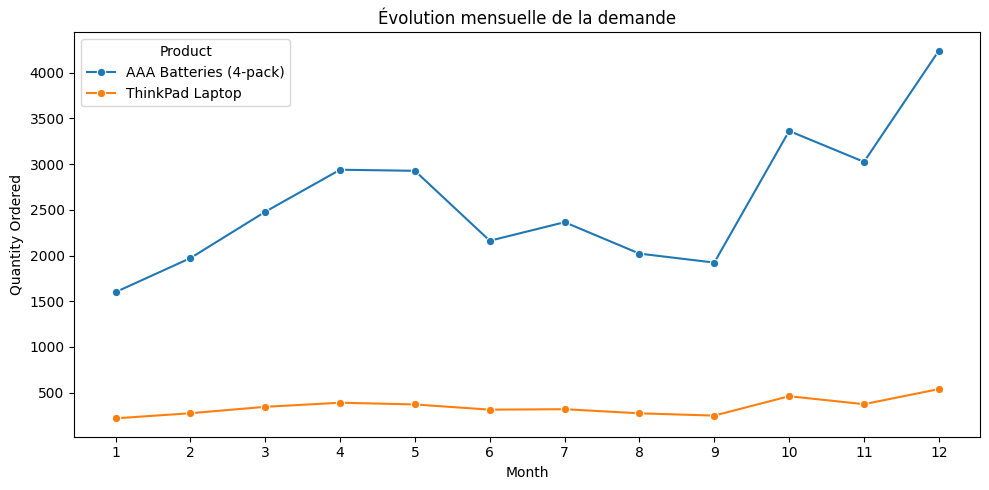

In [ ]:
monthly = df_filtered.groupby(['Month', 'Product'])['Quantity Ordered'].sum().reset_index()
# visualisation quantité de produit commandée par mois par produit
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly, x='Month', y='Quantity Ordered', hue='Product', marker='o')
plt.title('Évolution mensuelle de la demande')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

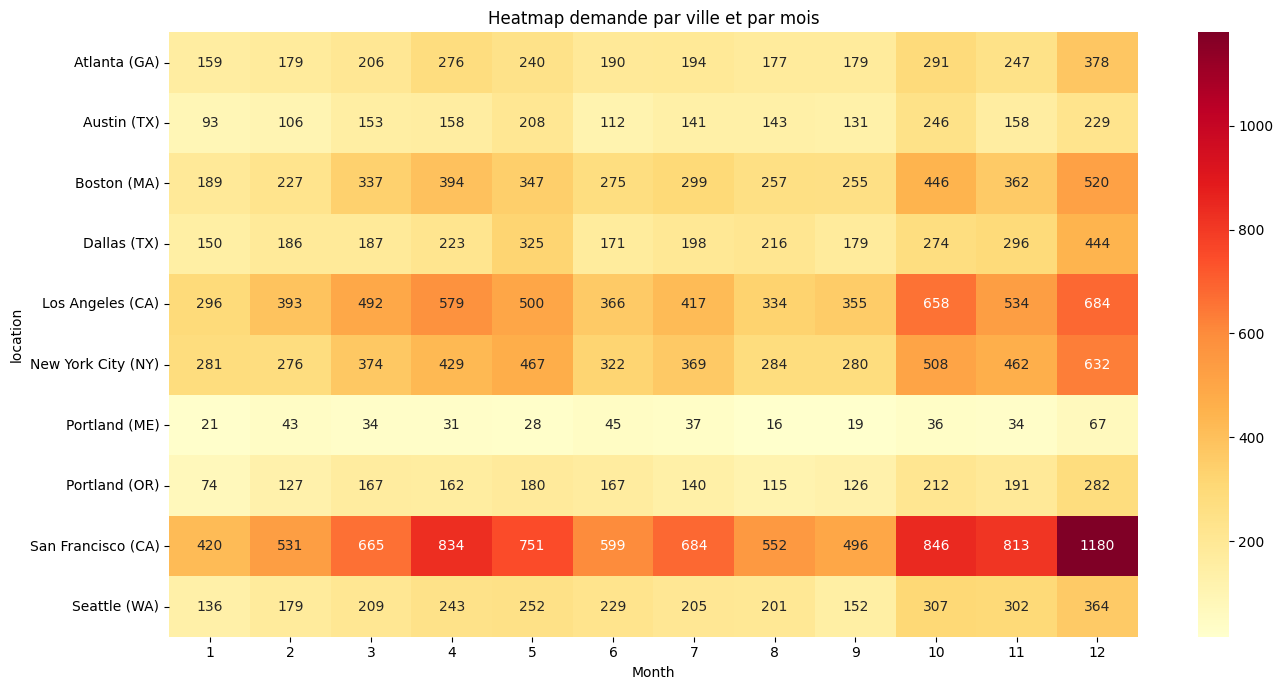

In [ ]:
pivot = df_filtered.groupby(['location', 'Month'])['Quantity Ordered'].sum().unstack()
# Visualisation des quantités de commandes par ville et par mois
plt.figure(figsize=(14, 7))
sns.heatmap(pivot, cmap='YlOrRd', annot=True, fmt='.0f')
plt.title('Heatmap demande par ville et par mois')
plt.tight_layout()
plt.show()

**Produit le plus vendu** : les AAA Batteries est plus vendu par rapport au ThinkPad Laptop dans toutes les villes.

**Villes qui ont le plus de vente** : San Francisco, Los Angeles et New York represente le plus de ventes. San Francisco est le ville numéro 1 de la vente.

**Mois qui ont le plus de vente** : la demande explose en décembre pour les deux produits puis le mois d'Avril.

**Ville qui ont le moins de vente** : Portland (ME) 

**En résumé** : prévention de plus de stock à San Francisco et Los Angeles, et anticiper l'augmentation des ventes en mois de décembre. Pour optimiser les ventes il faut prendre en compte les paramètre comme le ville, le mois et le produit donc pour prédire la quantité de commande des produits, il faux 

**Modèle de prediction de vente**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# demande par ville, produit et mois
model_df = df_filtered.groupby(['location', 'Product', 'Month'])['Quantity Ordered'].sum().reset_index()
print(model_df.head())
# variables catégorielles
le_location = LabelEncoder()
le_product = LabelEncoder()

model_df['location_encoded'] = le_location.fit_transform(model_df['location'])
model_df['product_encoded'] = le_product.fit_transform(model_df['Product'])

# les x sont les variables qui ont des effets sur la quantité de commande: location, produit, mois
# le est le variable à prédire selon les variation du location, produit et mois: quantité de commande
X = model_df[['location_encoded', 'product_encoded', 'Month']]
y = model_df['Quantity Ordered']

       location                 Product  Month  Quantity Ordered
0  Atlanta (GA)  AAA Batteries (4-pack)      1             131.0
1  Atlanta (GA)  AAA Batteries (4-pack)      2             152.0
2  Atlanta (GA)  AAA Batteries (4-pack)      3             183.0
3  Atlanta (GA)  AAA Batteries (4-pack)      4             239.0
4  Atlanta (GA)  AAA Batteries (4-pack)      5             210.0


**Entrainement du modèle de prediction**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
# on split les données en données d'entrainement et en donnée de validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# modèle de prédiction random forest
model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42, verbose=2 )
model.fit(X_train, y_train);

building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.1s


building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200
building tree 176 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200
building tree 188 of 200
building tree 189 of 200
building tree 190 of 200
building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200
building tree 195 of 200
building tree 196 of 200
building tree 197 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished


**Evaluation du modèle de prédistion**

In [ ]:
y_pred = model.predict(X_test)

print(f"MAE  : {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R²   : {r2_score(y_test, y_pred):.2f}")

MAE  : 26.22
R²   : 0.88


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


In [ ]:
# on test le modèle le modèle gradient boosting avec le même n_estimators
from sklearn.ensemble import GradientBoostingRegressor

model_gb = GradientBoostingRegressor(n_estimators=200, random_state=42)
model_gb.fit(X_train, y_train)

y_pred_gb = model_gb.predict(X_test)

print(f"MAE  : {mean_absolute_error(y_test, y_pred_gb):.2f}")
print(f"R²   : {r2_score(y_test, y_pred_gb):.2f}")

MAE  : 26.75
R²   : 0.83


**le modèle random forest donne la meilleure prédistion par rapport au modèle gradient boosting donc on va garder le modèle random forest**

In [ ]:
# Prédiction de la demande pour chaque ville et produit pour les 12 mois
import numpy as np

villes = model_df['location'].unique()
produits = model_df['Product'].unique()
mois = range(1, 13)

predictions = []
for ville in villes:
    for produit in produits:
        for mois_i in mois:
            loc_enc = le_location.transform([ville])[0]
            prod_enc = le_product.transform([produit])[0]
            pred = model.predict([[loc_enc, prod_enc, mois_i]])[0]
            predictions.append({
                'location': ville,
                'Product': produit,
                'Month': mois_i,
                'predicted_demand': round(pred)
            })

df_pred = pd.DataFrame(predictions)
print(df_pred.head(10))

c:\Users\voadi\Documents\Voady\test-Data-engineer-voady\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
c:\Users\voadi\Documents\Voady\test-Data-engineer-voady\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
c:\Users\voadi\Documents\Voady\test-Data-engineer-voady\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have

       location                 Product  Month  predicted_demand
0  Atlanta (GA)  AAA Batteries (4-pack)      1               141
1  Atlanta (GA)  AAA Batteries (4-pack)      2               153
2  Atlanta (GA)  AAA Batteries (4-pack)      3               176
3  Atlanta (GA)  AAA Batteries (4-pack)      4               213
4  Atlanta (GA)  AAA Batteries (4-pack)      5               209
5  Atlanta (GA)  AAA Batteries (4-pack)      6               173
6  Atlanta (GA)  AAA Batteries (4-pack)      7               161
7  Atlanta (GA)  AAA Batteries (4-pack)      8               161
8  Atlanta (GA)  AAA Batteries (4-pack)      9               159
9  Atlanta (GA)  AAA Batteries (4-pack)     10               211


[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
c:\Users\voadi\Documents\Voady\test-Data-engineer-voady\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
c:\Users\voadi\Documents\Voady\test-Data-engineer-voady\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


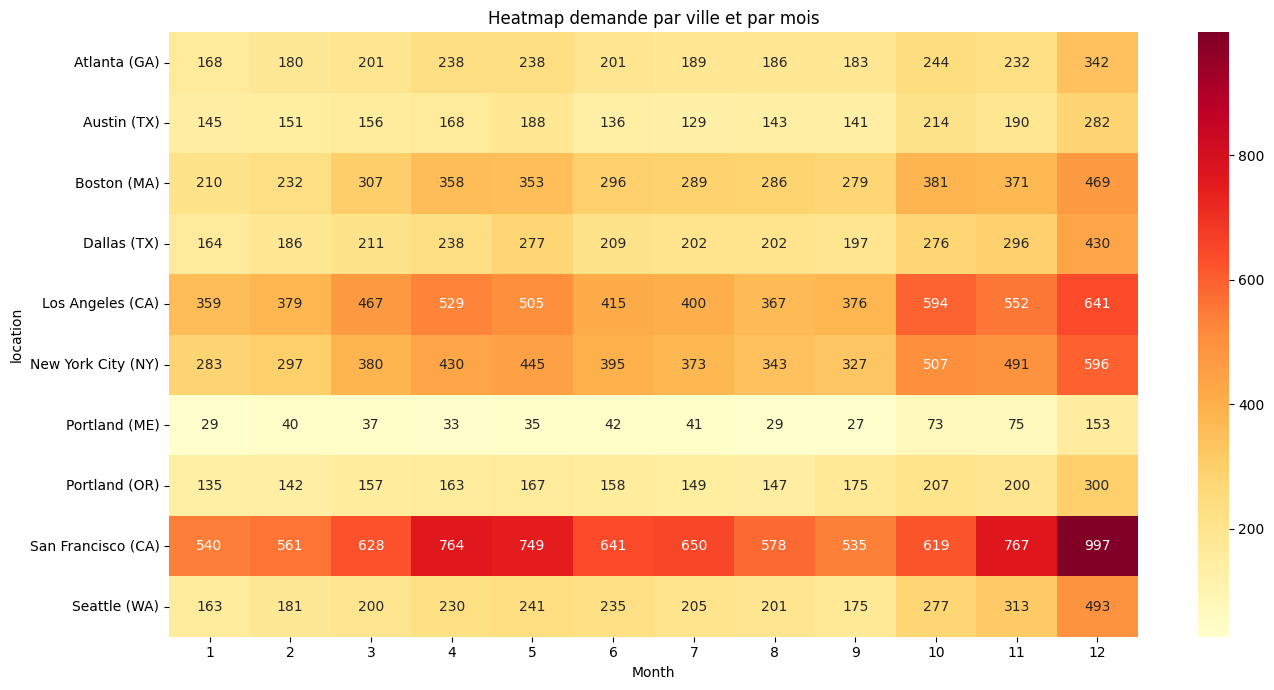

In [ ]:
pivot = df_pred.groupby(['location', 'Month'])['predicted_demand'].sum().unstack()
# Visualisation des quantités de commandes par ville et par mois pour les données prédites
plt.figure(figsize=(14, 7))
sns.heatmap(pivot, cmap='YlOrRd', annot=True, fmt='.0f')
plt.title('Heatmap demande par ville et par mois')
plt.tight_layout()
plt.show()

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


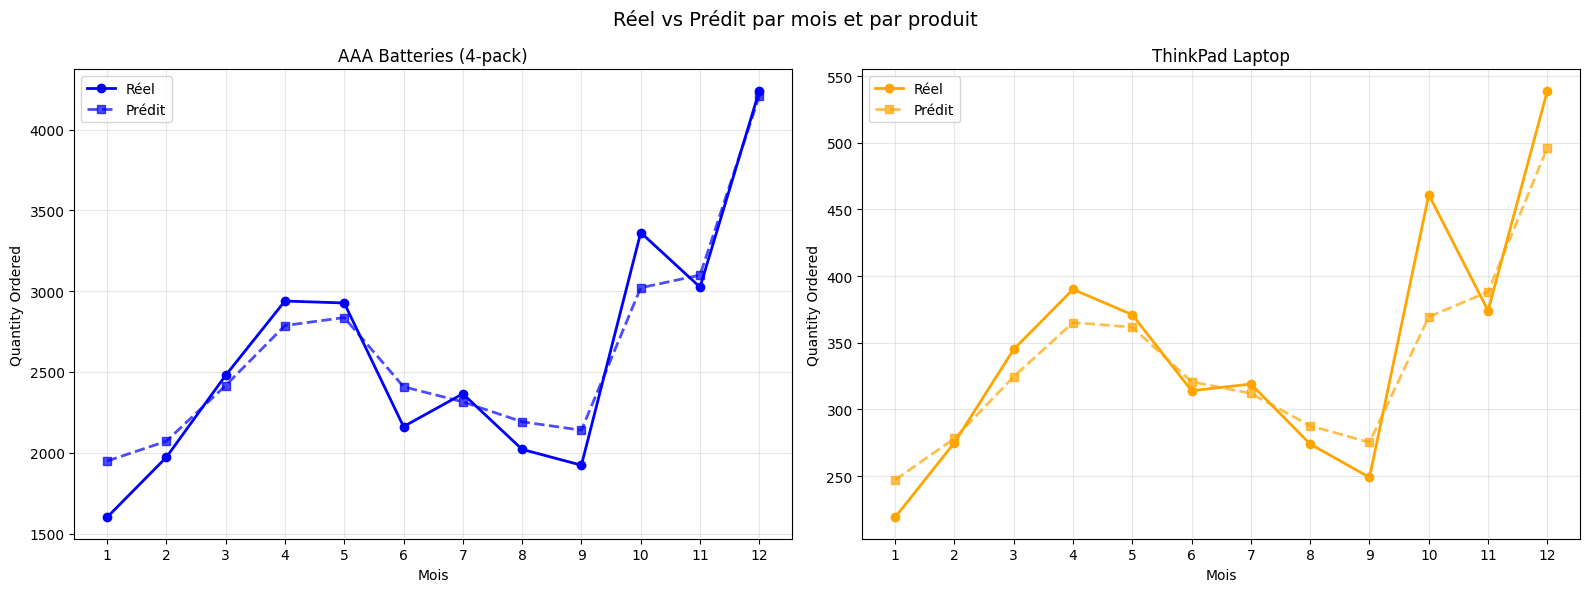

In [ ]:
# Visualisation côte à côte des données réelles et des données predites
import matplotlib.pyplot as plt

# Données réelles par mois et produit
real = df_filtered.groupby(['Month', 'Product'])['Quantity Ordered'].sum().reset_index()

# Prédictions par mois et produit
model_df['predicted'] = model.predict(X)
pred = model_df.groupby(['Month', 'Product'])['predicted'].sum().reset_index()

# Produits
produits = ['AAA Batteries (4-pack)', 'ThinkPad Laptop']
colors = ['blue', 'orange']

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for i, produit in enumerate(produits):
    ax = axes[i]
    
    # Données réelles
    real_prod = real[real['Product'] == produit]
    ax.plot(real_prod['Month'], real_prod['Quantity Ordered'], 
            marker='o', color=colors[i], label='Réel', linewidth=2)
    
    # Prédictions
    pred_prod = pred[pred['Product'] == produit]
    ax.plot(pred_prod['Month'], pred_prod['predicted'], 
            marker='s', color=colors[i], label='Prédit', 
            linewidth=2, linestyle='--', alpha=0.7)
    
    ax.set_title(f'{produit}')
    ax.set_xlabel('Mois')
    ax.set_ylabel('Quantity Ordered')
    ax.legend()
    ax.set_xticks(range(1, 13))
    ax.grid(True, alpha=0.3)

plt.suptitle('Réel vs Prédit par mois et par produit', fontsize=14)
plt.tight_layout()
plt.show()

In [53]:
from sklearn.preprocessing import MinMaxScaler

# 1. Générer les prédictions
model_df['predicted_demand'] = model.predict(X)

predictions = []
for ville in model_df['location'].unique():
    for produit in model_df['Product'].unique():
        for mois_i in range(1, 13):
            loc_enc = le_location.transform([ville])[0]
            prod_enc = le_product.transform([produit])[0]
            pred = model.predict([[loc_enc, prod_enc, mois_i]])[0]
            predictions.append({
                'location': ville,
                'Product': produit,
                'Month': mois_i,
                'predicted_demand': round(pred)
            })

df_pred = pd.DataFrame(predictions)

# 2. Calculer le score
scaler = MinMaxScaler(feature_range=(0, 100))
df_pred['score_demande'] = scaler.fit_transform(df_pred[['predicted_demand']])

# 3. Définir la zone
def categorize_zone(score):
    if score >= 70:
        return 'Zone Haute'
    elif score >= 40:
        return 'Zone Moyenne'
    else:
        return 'Zone Basse'

df_pred['zone'] = df_pred['score_demande'].apply(categorize_zone)

# Vérifier
print(df_pred.head())

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
c:\Users\voadi\Documents\Voady\test-Data-engineer-voady\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
c:\Users\voadi\Documents\Voady\test-Data-engineer-voady\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]

       location                 Product  Month  predicted_demand  \
0  Atlanta (GA)  AAA Batteries (4-pack)      1               141   
1  Atlanta (GA)  AAA Batteries (4-pack)      2               153   
2  Atlanta (GA)  AAA Batteries (4-pack)      3               176   
3  Atlanta (GA)  AAA Batteries (4-pack)      4               213   
4  Atlanta (GA)  AAA Batteries (4-pack)      5               209   

   score_demande        zone  
0      15.540541  Zone Basse  
1      16.891892  Zone Basse  
2      19.481982  Zone Basse  
3      23.648649  Zone Basse  
4      23.198198  Zone Basse  


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
c:\Users\voadi\Documents\Voady\test-Data-engineer-voady\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
c:\Users\voadi\Documents\Voady\test-Data-engineer-voady\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
c:\Users\voadi\Documents\Voady\test-Data-engineer-voady\.venv\Lib\site-p

In [60]:
import pickle

# Sauvegarder le modèle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Sauvegarder les prédictions
df_pred.to_csv(r'C:\Users\voadi\Documents\Voady\test-Data-engineer-voady\data\predictions.csv', index=False)

# Sauvegarder les encodeurs
with open('encoders.pkl', 'wb') as f:
    pickle.dump({'le_location': le_location, 'le_product': le_product}, f)